In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
import math
import xgboost as xgb
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")
from sklearn.linear_model import Ridge, Lasso, Lars, ElasticNet
from sklearn.model_selection import validation_curve, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LarsCV
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVR
import statsmodels.api as sn
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline

In [2]:
df = pd.read_csv("Movie_collection_train.csv")

In [3]:
df.head()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Genre,Avg_age_actors,MPAA_film_rating,Num_multiplex,3D_available
0,48000,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,Thriller,23,PG,494,YES
1,43200,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,Drama,42,PG,462,NO
2,69400,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,Comedy,38,PG,458,NO
3,66800,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,Drama,45,PG,472,YES
4,72400,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,Drama,55,PG,395,NO


In [4]:
df.shape

(400, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Collection           400 non-null    int64  
 1   Marketin_expense     400 non-null    float64
 2   Production_expense   400 non-null    float64
 3   Multiplex_coverage   400 non-null    float64
 4   Budget               400 non-null    float64
 5   Movie_length         400 non-null    float64
 6   Lead_ Actor_Rating   400 non-null    float64
 7   Lead_Actress_rating  400 non-null    float64
 8   Director_rating      400 non-null    float64
 9   Producer_rating      400 non-null    float64
 10  Critic_rating        400 non-null    float64
 11  Trailer_views        400 non-null    int64  
 12  Time_taken           392 non-null    float64
 13  Twitter_hastags      400 non-null    float64
 14  Genre                400 non-null    object 
 15  Avg_age_actors       400 non-null    int

In [6]:
df.describe()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,392.000000,400.000000,400.000000,400.000000
mean,48646.500000,55.017180,73.832700,0.469881,35197.771537,137.581750,7.810275,7.982812,7.813375,7.993887,7.894100,463223.567500,157.790000,258.083840,38.715000,523.650000
std,18308.499136,119.755634,13.023426,0.113920,4075.766926,28.990673,1.088694,1.089923,1.093581,1.088619,0.672413,65225.567649,31.723517,94.621476,12.651043,103.661283
min,10000.000000,20.126400,55.920000,0.129000,19781.355000,76.400000,3.840000,4.035000,3.840000,4.030000,6.600000,215432.000000,0.000000,201.632000,3.000000,333.000000
25%,37800.000000,21.321950,63.250000,0.419000,32721.727500,111.175000,7.092500,7.252500,7.123750,7.273750,7.320000,436793.500000,133.360000,223.804000,26.000000,451.000000
50%,45000.000000,23.214700,69.030000,0.494500,34593.762500,142.250000,7.995000,8.157500,7.990000,8.140000,7.960000,474930.000000,159.720000,246.680000,39.000000,510.000000
75%,56500.000000,34.638300,82.840000,0.558000,37142.118750,165.400000,8.725000,8.912500,8.740000,8.931250,8.400000,507690.500000,183.210000,283.444000,50.000000,571.000000
max,100000.000000,1799.524000,106.300000,0.615000,48772.900000,173.500000,9.435000,9.540000,9.425000,9.635000,9.400000,567784.000000,217.520000,2022.400000,60.000000,868.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f01f90296d0>]],
      dtype=object)

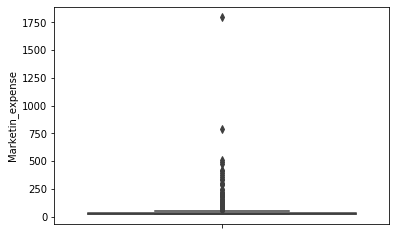

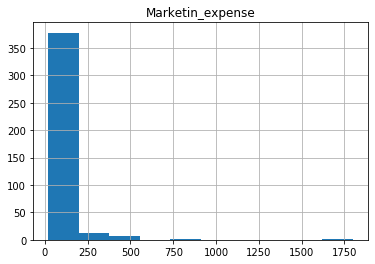

In [7]:
sns.boxplot(y='Marketin_expense', data=df)
df.hist(column='Marketin_expense')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f01f8ee6650>]],
      dtype=object)

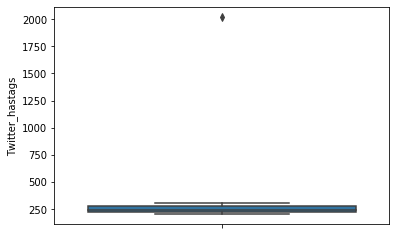

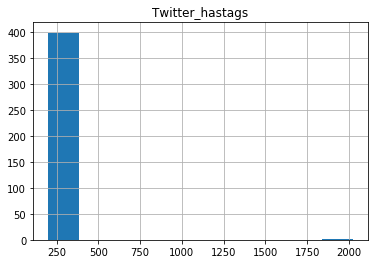

In [8]:
sns.boxplot(y='Twitter_hastags', data=df)
df.hist(column='Twitter_hastags')

In [9]:
print(np.percentile(df.Twitter_hastags,[99])[0])
twitter_df = df[df['Twitter_hastags']>np.percentile(df.Twitter_hastags,[99])[0]]
df['Twitter_hastags'].describe()

308.0


count     400.000000
mean      258.083840
std        94.621476
min       201.632000
25%       223.804000
50%       246.680000
75%       283.444000
max      2022.400000
Name: Twitter_hastags, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f01f0e58650>]],
      dtype=object)

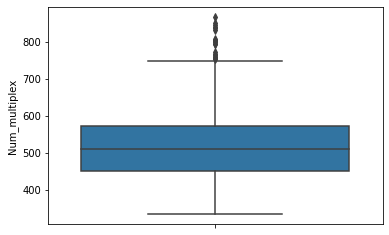

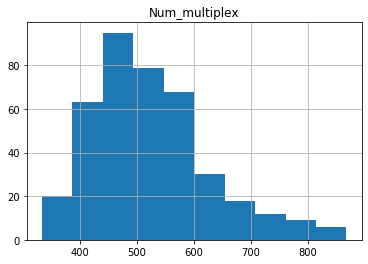

In [10]:
sns.boxplot(y='Num_multiplex', data=df)
df.hist(column='Num_multiplex')

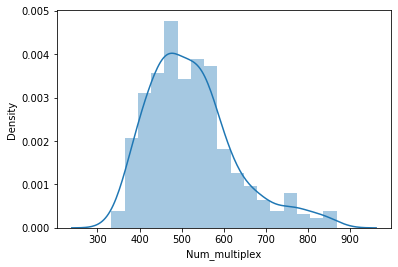

In [11]:
sns.distplot(df['Num_multiplex'])

**OBSERVATIONS**

Marketin_expense contains outlier

Twitter_hashtags either negatiely skewed or contains outlier

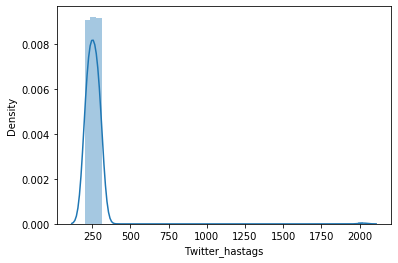

In [12]:
sns.distplot(df['Twitter_hastags']) #checking the skewness of twitter hashtags

In [13]:
#deleting detected outliers
new_df = df[df['Marketin_expense']<np.percentile(df.Marketin_expense,[92])[0]]

In [14]:
new_df = new_df[new_df['Twitter_hastags']<500]

In [15]:
new_df.describe()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,359.000000,367.000000,367.000000,367.000000
mean,49936.784741,30.505949,72.331172,0.483017,35451.298597,134.760490,7.693910,7.866158,7.696512,7.877711,7.930463,471371.275204,157.764123,252.550801,38.727520,512.975477
std,16794.421840,18.839569,12.498398,0.108925,3897.213073,28.536014,1.057784,1.058376,1.062361,1.057139,0.674578,56646.227314,31.676055,33.627903,12.639252,100.102499
min,23600.000000,20.126400,55.920000,0.129000,19781.355000,76.400000,3.840000,4.035000,3.840000,4.030000,6.600000,233100.000000,0.000000,202.096000,3.000000,333.000000
25%,39000.000000,21.225600,62.970000,0.456000,32963.370000,109.500000,6.980000,7.145000,7.007500,7.167500,7.330000,445099.000000,133.320000,223.768000,27.000000,445.000000
50%,45600.000000,22.782800,67.820000,0.507000,34713.195000,136.500000,7.890000,8.040000,7.870000,8.055000,7.960000,480435.000000,159.840000,244.816000,39.000000,501.000000
75%,57100.000000,30.048100,76.180000,0.563000,37340.710000,162.050000,8.575000,8.735000,8.570000,8.750000,8.420000,510321.500000,182.400000,283.432000,50.000000,559.000000
max,100000.000000,125.861000,106.300000,0.615000,48772.900000,173.500000,9.330000,9.480000,9.240000,9.495000,9.400000,567784.000000,217.520000,308.000000,60.000000,868.000000


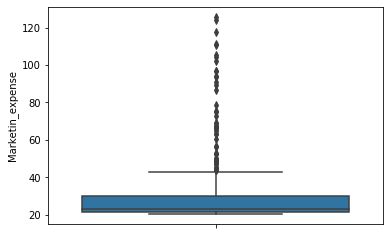

In [16]:
sns.boxplot(y='Marketin_expense', data=new_df)

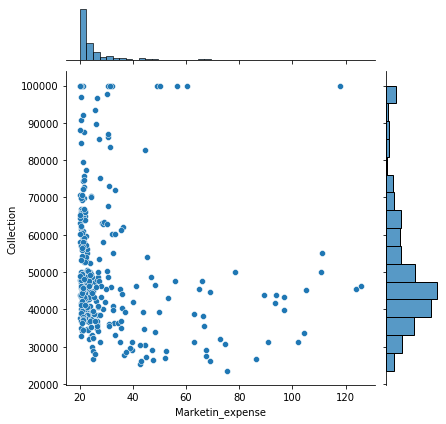

In [17]:
sns.jointplot(x="Marketin_expense", y="Collection", data=new_df)

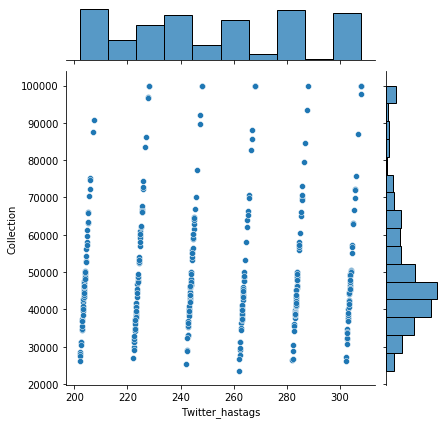

In [18]:
sns.jointplot(x="Twitter_hastags", y="Collection", data=new_df)

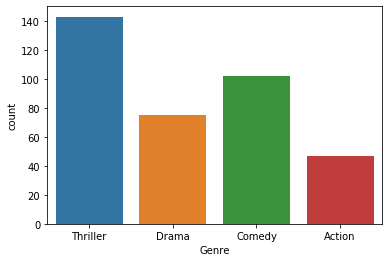

In [19]:
sns.countplot(x="Genre", data=new_df)

In [20]:
new_df.Marketin_expense = np.log(1+new_df.Marketin_expense)

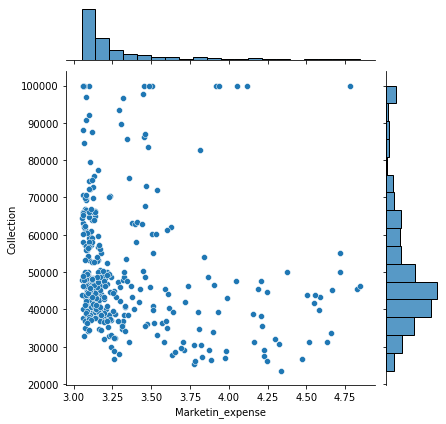

In [21]:
sns.jointplot(x="Marketin_expense", y="Collection", data=new_df)

In [22]:
new_df.head()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Genre,Avg_age_actors,MPAA_film_rating,Num_multiplex,3D_available
0,48000,3.050523,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,Thriller,23,PG,494,YES
1,43200,3.070199,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,Drama,42,PG,462,NO
3,66800,3.074885,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,Drama,45,PG,472,YES
4,72400,3.108212,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,Drama,55,PG,395,NO
5,57400,3.072554,59.36,0.542,35718.650,132.2,6.890,7.100,6.885,7.005,7.26,498425,143.48,284.592,Comedy,53,PG,460,YES


In [23]:
new_df.drop(['MPAA_film_rating'], axis=1, inplace=True) #dropping MPAA_film becase it has a constant zero variance, all its values are the same

In [24]:
encode = LabelEncoder()
for column in list(new_df.columns):
  if new_df[column].dtype == np.object:
    new_df[column] = new_df[column].astype(str)
    new_df[column] = encode.fit_transform(new_df[column])

In [25]:
new_df.head()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,3D_available
0,48000,3.050523,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,3,23,494,1
1,43200,3.070199,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,2,42,462,0
3,66800,3.074885,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,2,45,472,1
4,72400,3.108212,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,2,55,395,0
5,57400,3.072554,59.36,0.542,35718.650,132.2,6.890,7.100,6.885,7.005,7.26,498425,143.48,284.592,1,53,460,1


In [26]:
new_df['avg_people_rating'] = (new_df['Lead_ Actor_Rating']+new_df['Lead_Actress_rating']+new_df['Director_rating']+new_df['Producer_rating'])/4
new_df.drop(['Lead_ Actor_Rating', 'Lead_Actress_rating', 'Director_rating', 'Producer_rating'], axis=1, inplace=True)

In [27]:
new_df.shape

(367, 15)

(15.0, 0.0)

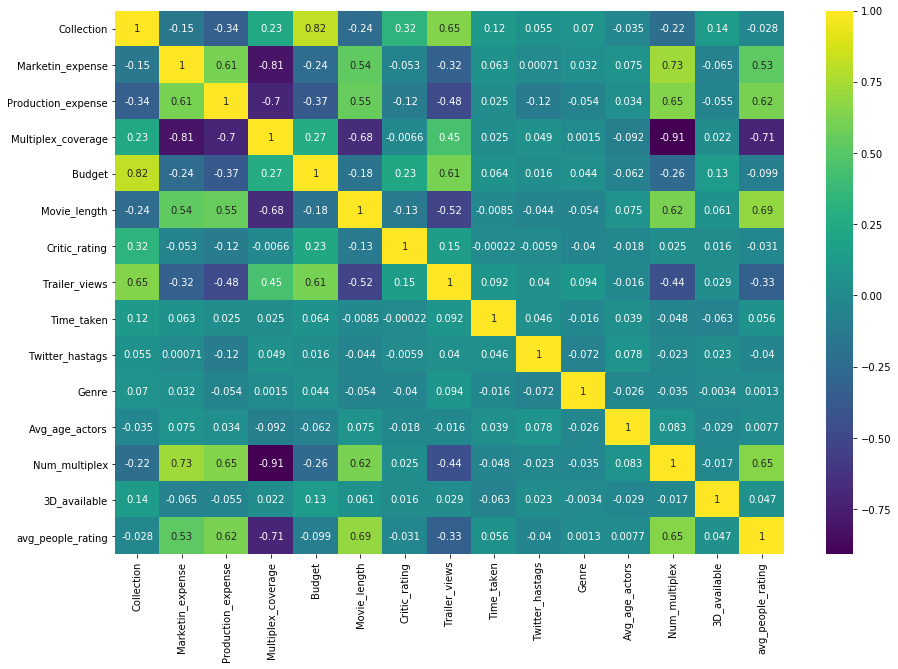

In [28]:
plt.figure(figsize = (15, 10))
cm = new_df.corr()
ax = sns.heatmap(cm, annot=True, cmap='viridis')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

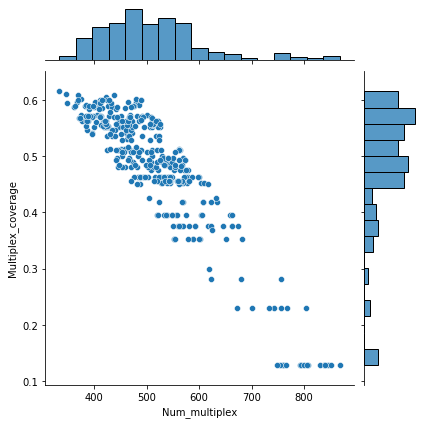

In [29]:
sns.jointplot(x="Num_multiplex", y="Multiplex_coverage", data=new_df)

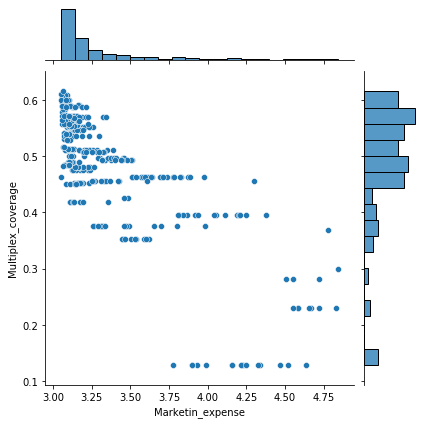

In [30]:
sns.jointplot(x="Marketin_expense", y="Multiplex_coverage", data=new_df)

**OBSERVATION**

The above cell 34 shows the correlation between all the variables of the dataset, however discovered in this dataset is the high negative correlation between two independent variables "Multiplex_coverage" and "Num_multiplex" which have a correlation coefficient of -0.914065, in addition the scatter plot in the above cell 35 shows the correlation relationship between these two variables which explains the high correlation between them. This type of relationship is called Linear correlation.

This means that the above two variables cannot be used together in building any model from this dataset to avoid multi-collinearity, therefore one of them must be removed.

In [31]:
new_df.drop(['Num_multiplex'], axis=1, inplace=True) #dropping multiplex_coverage because of its high correlation with some other independent variable

#### Testing: Performing simple and multiple linear regression via Ordinary Least Square

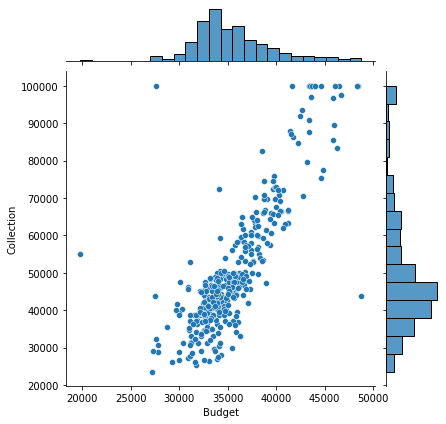

In [32]:
sns.jointplot(x='Budget', y='Collection', data=new_df) #budget is the only independent variable that seem to have the best correlation with the dependent variable

In [33]:
x = sn.add_constant(new_df['Budget'])

In [34]:
lm = sn.OLS(new_df['Collection'], x).fit()

In [35]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Collection   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     740.4
Date:                Mon, 14 Jun 2021   Prob (F-statistic):           7.68e-90
Time:                        08:53:13   Log-Likelihood:                -3887.4
No. Observations:                 367   AIC:                             7779.
Df Residuals:                     365   BIC:                             7787.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.509e+04   4622.656    -16.245      0.000   -8.42e+04    -6.6e+04
Budget         3.5268      0.130     27.210      0.000       3.272       3.782
==============================================================================
Omnibus:                      208.298   Durbin-Watson:                   1.333
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4584.702
Skew:                           1.900   Prob(JB):                         0.00
Kurtosis:                      19.893   Cond. No.                     3.27e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
xlin = new_df.drop(['Collection', 'Time_taken'], axis=1) #dropping time taken coz it has missing values
ylin = new_df['Collection']
xlin_const = sn.add_constant(xlin)
lm_ = sn.OLS(ylin, xlin_const).fit()

In [37]:
lm_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Collection   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     94.69
Date:                Mon, 14 Jun 2021   Prob (F-statistic):          1.31e-102
Time:                        08:53:18   Log-Likelihood:                -3826.9
No. Observations:                 367   AIC:                             7680.
Df Residuals:                     354   BIC:                             7731.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.713e+05   1.53e+04    -11.199      0.000   -2.01e+05   -1.41e+05
Marketin_expense    8852.2513   1916.335      4.619      0.000    5083.418    1.26e+04
Production_expense   -81.6193     54.790     -1.490      0.137    -189.374      26.135
Multiplex_coverage   3.19e+04   9031.845      3.532      0.000    1.41e+04    4.97e+04
Budget                 2.7092      0.154     17.624      0.000       2.407       3.011
Movie_length         -66.7892     25.228     -2.647      0.008    -116.405     -17.173
Critic_rating       3601.8505    683.686      5.268      0.000    2257.255    4946.447
Trailer_views          0.0620      0.012      5.290      0.000       0.039       0.085
Twitter_hastags       11.3997     13.214      0.863      0.389     -14.589      37.388
Genre                225.4242    410.290      0.549      0.583    -581.489    1032.337
Avg_age_actors        28.5015     35.023      0.814      0.416     -40.378      97.381
3D_available        1608.2835    900.825      1.785      0.075    -163.359    3379.926
avg_people_rating   4103.5778    681.496      6.021      0.000    2763.289    5443.867
==============================================================================
Omnibus:                      118.251   Durbin-Watson:                   1.457
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1160.114
Skew:                           1.047   Prob(JB):                    1.21e-252
Kurtosis:                      11.455   Cond. No.                     1.87e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
new_df.drop(['Time_taken'], axis=1, inplace=True)

In [39]:
new_df.head()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Critic_rating,Trailer_views,Twitter_hastags,Genre,Avg_age_actors,3D_available,avg_people_rating
0,48000,3.050523,59.62,0.462,36524.125,138.7,7.94,527367,223.840,3,23,1,7.95625
1,43200,3.070199,69.14,0.531,35668.655,152.4,7.44,494055,243.456,2,42,0,7.51625
3,66800,3.074885,59.36,0.542,38873.890,119.3,8.26,516279,225.344,2,45,1,6.96750
4,72400,3.108212,59.36,0.542,39701.585,127.7,8.26,531448,225.792,2,55,0,6.96875
5,57400,3.072554,59.36,0.542,35718.650,132.2,7.26,498425,284.592,1,53,1,6.97000


In [40]:
train_data, test_data = np.split(new_df.sample(frac=1, random_state=1), [int(0.90*len(new_df))])
test_data.drop(['Collection'], axis=1, inplace=True)
# train_data.to_csv('train.csv')
# test_data.to_csv('test.csv')

In [41]:
print(train_data.shape, test_data.shape)

(330, 13) (37, 12)


In [42]:
train_data = pd.DataFrame(data=train_data, columns=new_df.columns)

In [43]:
x = train_data.drop(['Collection'], axis=1)
y = train_data['Collection']

In [44]:
sc = StandardScaler()
sc.fit(x)
x = sc.transform(x)

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [46]:
lg = LinearRegression()
lg.fit(x_train, y_train)
y_pred = lg.predict(x_test)
print('Accuracy_score: ',lg.score(x_test, y_test))
print('MSE: ',mean_squared_error(y_test, y_pred))
print('RMSE: ',math.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE: ',mean_absolute_error(y_test, y_pred))

Accuracy_score:  0.5212734525128375
MSE:  94528508.82306835
RMSE:  9722.577272671499
MAE:  5812.806315555653


In [47]:
svr = LinearSVR()
svr.fit(x_train, y_train)
y1_pred = svr.predict(x_test)
print('Accuracy_score: ',svr.score(x_test, y_test))
print('MSE: ',mean_squared_error(y_test, y1_pred))
print('RMSE: ',math.sqrt(mean_squared_error(y_test, y1_pred)))
print('MAE: ',mean_absolute_error(y_test, y1_pred))

Accuracy_score:  -11.122158705712767
MSE:  2393620308.258197
RMSE:  48924.63907131249
MAE:  46866.860540695445


In [48]:
ridge = Ridge(alpha=0.5)
ridge.fit(x_train, y_train)
ridge.score(x_test, y_test)

0.5217039139980244

In [49]:
param_range = np.logspace(-2,8,100)
train_scores, test_scores = validation_curve(Ridge(), x_train, y_train, 'alpha', param_range, scoring='r2')

In [50]:
print(test_scores)

[[ 7.28557909e-01  7.45962756e-01  8.55600160e-01  7.40764971e-01
   7.25537308e-01]
 [ 7.28556499e-01  7.45971302e-01  8.55599406e-01  7.40764813e-01
   7.25540043e-01]
 [ 7.28554719e-01  7.45982083e-01  8.55598455e-01  7.40764613e-01
   7.25543493e-01]
 [ 7.28552474e-01  7.45995683e-01  8.55597254e-01  7.40764359e-01
   7.25547844e-01]
 [ 7.28549642e-01  7.46012837e-01  8.55595737e-01  7.40764036e-01
   7.25553332e-01]
 [ 7.28546067e-01  7.46034473e-01  8.55593821e-01  7.40763624e-01
   7.25560253e-01]
 [ 7.28541558e-01  7.46061759e-01  8.55591400e-01  7.40763099e-01
   7.25568978e-01]
 [ 7.28535868e-01  7.46096163e-01  8.55588341e-01  7.40762428e-01
   7.25579977e-01]
 [ 7.28528690e-01  7.46139534e-01  8.55584472e-01  7.40761565e-01
   7.25593838e-01]
 [ 7.28519634e-01  7.46194197e-01  8.55579578e-01  7.40760453e-01
   7.25611299e-01]
 [ 7.28508210e-01  7.46263068e-01  8.55573383e-01  7.40759012e-01
   7.25633286e-01]
 [ 7.28493800e-01  7.46349807e-01  8.55565535e-01  7.40757135e-01

In [51]:
test_mean = np.mean(test_scores, axis=1)

In [52]:
max(test_mean)

0.7625934714205117

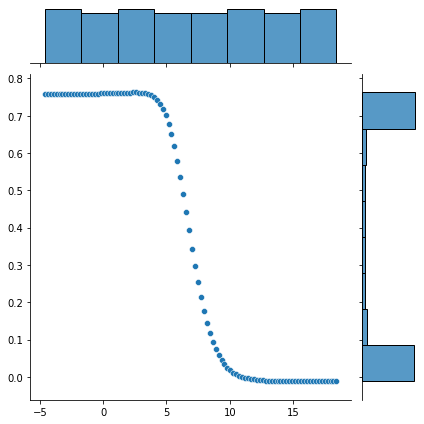

In [53]:
sns.jointplot(x=np.log(param_range), y=test_mean)

In [54]:
np.where(test_mean==max(test_mean))

(array([31]),)

In [55]:
param_range[35]

34.30469286314919

In [56]:
ridge_best = Ridge(alpha = param_range[35])
ridge_best.fit(x_train, y_train)
r2_score(y_test, ridge_best.predict(x_test))

0.5325265808846648

In [57]:
lasso = Lasso(alpha = 0.5)
lasso.fit(x_train, y_train)
r2_score(y_test, lasso.predict(x_test))

0.5212652331166048

In [58]:
train_scores1, test_scores1 = validation_curve(Lasso(), x_train, y_train, 'alpha', param_range, scoring='r2')

In [59]:
test_scores1

array([[ 7.28562787e-01,  7.45930071e-01,  8.55603334e-01,
         7.40765771e-01,  7.25527401e-01],
       [ 7.28562657e-01,  7.45930063e-01,  8.55603289e-01,
         7.40765823e-01,  7.25527548e-01],
       [ 7.28562492e-01,  7.45930053e-01,  8.55603309e-01,
         7.40765889e-01,  7.25527728e-01],
       [ 7.28562285e-01,  7.45930041e-01,  8.55603480e-01,
         7.40765972e-01,  7.25527953e-01],
       [ 7.28562024e-01,  7.45930026e-01,  8.55603694e-01,
         7.40766077e-01,  7.25528234e-01],
       [ 7.28561694e-01,  7.45930349e-01,  8.55603965e-01,
         7.40766209e-01,  7.25528588e-01],
       [ 7.28561281e-01,  7.45930402e-01,  8.55604307e-01,
         7.40766378e-01,  7.25529032e-01],
       [ 7.28560756e-01,  7.45930371e-01,  8.55604738e-01,
         7.40766589e-01,  7.25529596e-01],
       [ 7.28560812e-01,  7.45930331e-01,  8.55605138e-01,
         7.40766854e-01,  7.25530309e-01],
       [ 7.28560128e-01,  7.45930281e-01,  8.55605824e-01,
         7.40767192e-01

In [60]:
test_mean1 = np.mean(test_scores1, axis=1)

In [61]:
max(test_mean1)

0.759508257204451

In [62]:
np.where(test_mean1==max(test_mean1))

(array([36]),)

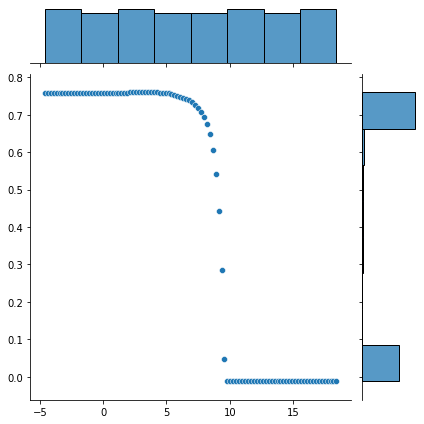

In [63]:
sns.jointplot(x=np.log(param_range), y=test_mean1)

In [64]:
param_range[46]

443.06214575838777

In [65]:
lasso_best = Lasso(alpha = param_range[46])
lasso_best.fit(x_train, y_train)
r2_score(y_test, lasso_best.predict(x_test))

0.48697518283147656

In [66]:
elasticnet = ElasticNet()

In [67]:
train_scores2, test_scores2 = validation_curve(elasticnet, x_train, y_train, 'alpha', param_range, scoring='r2')

In [68]:
test_mean2 = np.mean(test_scores2, axis=1)

In [69]:
np.where(test_mean2==max(test_mean2))

(array([11]),)

In [70]:
elasticnet_best = ElasticNet(alpha=param_range[14], l1_ratio=0.7)
elasticnet_best.fit(x_train, y_train)
print('Accuracy score: ', elasticnet_best.score(x_test, y_test))
print('MSE: ',mean_squared_error(y_test, elasticnet_best.predict(x_test)))
print('RMSE: ',math.sqrt(mean_squared_error(y_test, elasticnet_best.predict(x_test))))
print('MAE: ',mean_absolute_error(y_test, elasticnet_best.predict(x_test)))

Accuracy score:  0.5309788880783274
MSE:  92612090.44957355
RMSE:  9623.517571531396
MAE:  5738.502068846722


In [71]:
model = Lars()
model.fit(x_train, y_train)
y_prediction = model.predict(x_test)
print('Accuracy score: ',model.score(x_test, y_test))
print('MSE: ',mean_squared_error(y_test, y_prediction))
print('RMSE: ',math.sqrt(mean_squared_error(y_test, y_prediction)))
print('MAE: ',mean_absolute_error(y_test, y_prediction))

Accuracy score:  0.5212734525128402
MSE:  94528508.82306783
RMSE:  9722.577272671471
MAE:  5812.806315555659


In [72]:
xgb_r = xgb.XGBRegressor()
xgb_r.fit(x_train, y_train)
y2_prediction = xgb_r.predict(x_test)
print('Accuracy score: ',xgb_r.score(x_test, y_test))
print('MSE: ',mean_squared_error(y_test, y2_prediction))
print('RMSE: ',math.sqrt(mean_squared_error(y_test, y2_prediction)))
print('MAE: ',mean_absolute_error(y_test, y2_prediction))

Accuracy score:  0.7097634109438199
MSE:  57309610.49347299
RMSE:  7570.311122633798
MAE:  4292.211795691288


In [73]:
ada_r = AdaBoostRegressor()
ada_r.fit(x_train, y_train)
y3_prediction = ada_r.predict(x_test)
print('Accuracy score: ',ada_r.score(x_test, y_test))
print('MSE: ',mean_squared_error(y_test, y3_prediction))
print('RMSE: ',math.sqrt(mean_squared_error(y_test, y3_prediction)))
print('MAE: ',mean_absolute_error(y_test, y3_prediction))

Accuracy score:  0.6338364022579499
MSE:  72302025.15721987
RMSE:  8503.059752654915
MAE:  5005.033014655215


In [74]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
gbr_prediction = gbr.predict(x_test)
print('Accuracy score: ',r2_score(y_test, gbr_prediction))
print('MSE: ',mean_squared_error(y_test, gbr_prediction))
print('RMSE: ',math.sqrt(mean_squared_error(y_test, gbr_prediction)))
print('MAE: ',mean_absolute_error(y_test, gbr_prediction))

Accuracy score:  0.7044604983141012
MSE:  58356714.369239904
RMSE:  7639.1566530108485
MAE:  4413.817798584852


In [75]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model = LarsCV(cv=cv, n_jobs=-1)
model.fit(x_train, y_train)
print('alpha: %f'%model.alpha_)

alpha: 2.449308


In [76]:
model_one = Ridge(alpha = model.alpha_)
model_one.fit(x_train, y_train)
y4_prediction = model_one.predict(x_test)
print('Accuracy score: ',model_one.score(x_test, y_test))

Accuracy score:  0.5232476212203793


Improving on the best model using Recursive feature elimination which is the xgboost

In [77]:
from sklearn.feature_selection import RFECV

In [78]:
fs = RFECV(xgb.XGBRegressor(), step=1, cv=5, scoring='r2')
fs.fit(x_train, y_train)

RFECV(cv=5,
      estimator=XGBRegressor(base_score=None, booster=None,
                             colsample_bylevel=None, colsample_bynode=None,
                             colsample_bytree=None, gamma=None, gpu_id=None,
                             importance_type='gain',
                             interaction_constraints=None, learning_rate=None,
                             max_delta_step=None, max_depth=None,
                             min_child_weight=None, missing=nan,
                             monotone_constraints=None, n_estimators=100,
                             n_jobs=None, num_parallel_tree=None,
                             random_state=None, reg_alpha=None, reg_lambda=None,
                             scale_pos_weight=None, subsample=None,
                             tree_method=None, validate_parameters=None,
                             verbosity=None),
      scoring='r2')

In [79]:
print('Evaluation metrics for recursive feature elimination')
y5_pred = fs.predict(x_test)
print('Accuracy score: ',fs.score(x_test, y_test))
print('MSE: ',mean_squared_error(y_test, y5_pred))
print('RMSE: ',math.sqrt(mean_squared_error(y_test, y5_pred)))
print('MAE: ',mean_absolute_error(y_test, y5_pred))

Evaluation metrics for recursive feature elimination
Accuracy score:  0.7242887881911574
MSE:  54441454.84492886
RMSE:  7378.445286435948
MAE:  4407.558179450758


In [80]:
compare = [[a,b] for (a, b) in zip(y_train, fs.predict(x_train))]
compare

[[39800, 39802.28],
 [43400, 43405.773],
 [56000, 55998.85],
 [26200, 26211.605],
 [33000, 33011.363],
 [86200, 86209.56],
 [66400, 66397.8],
 [50000, 50000.91],
 [42400, 42404.12],
 [47200, 47207.3],
 [45800, 45757.766],
 [48600, 48603.777],
 [44000, 44032.68],
 [55800, 55804.805],
 [63200, 63202.26],
 [26600, 26624.234],
 [36000, 35999.81],
 [60200, 60200.473],
 [50000, 49987.867],
 [49000, 48995.797],
 [64000, 63980.977],
 [49400, 49403.176],
 [45400, 45401.254],
 [45200, 45210.086],
 [48200, 48197.008],
 [37200, 37168.72],
 [75800, 75799.016],
 [37000, 36994.45],
 [53200, 53211.61],
 [100000, 99991.69],
 [89600, 89601.36],
 [70400, 70404.39],
 [43200, 43200.98],
 [49400, 49394.812],
 [34000, 33997.133],
 [43800, 43788.594],
 [45800, 45812.336],
 [31200, 31198.88],
 [42800, 42791.64],
 [45800, 45800.47],
 [53000, 53003.56],
 [43400, 43406.11],
 [37600, 37590.234],
 [65800, 65820.1],
 [40000, 40008.62],
 [62200, 62203.176],
 [29200, 29199.604],
 [35600, 35593.387],
 [42000, 42006.63]

In [81]:
new_df.columns

Index(['Collection', 'Marketin_expense', 'Production_expense',
       'Multiplex_coverage', 'Budget', 'Movie_length', 'Critic_rating',
       'Trailer_views', 'Twitter_hastags', 'Genre', 'Avg_age_actors',
       '3D_available', 'avg_people_rating'],
      dtype='object')

In [82]:
new_df.head()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Critic_rating,Trailer_views,Twitter_hastags,Genre,Avg_age_actors,3D_available,avg_people_rating
0,48000,3.050523,59.62,0.462,36524.125,138.7,7.94,527367,223.840,3,23,1,7.95625
1,43200,3.070199,69.14,0.531,35668.655,152.4,7.44,494055,243.456,2,42,0,7.51625
3,66800,3.074885,59.36,0.542,38873.890,119.3,8.26,516279,225.344,2,45,1,6.96750
4,72400,3.108212,59.36,0.542,39701.585,127.7,8.26,531448,225.792,2,55,0,6.96875
5,57400,3.072554,59.36,0.542,35718.650,132.2,7.26,498425,284.592,1,53,1,6.97000


In [83]:
#saving the preferred model for deployment
import pickle
with open('xgb.pk1', 'wb') as model:
    pickle.dump(fs, model)

In [2]:
#fs.predict([[3.0784, 64.9000, 0.5890, 36,829.6500, 96.9000, 8.1600, 529498, 244.4640, 3, 37, 0, 7.4413]])